In [131]:
from fin_data_fundamentals import find_fundamentals
from fin_data_fundamentals import get_fundamentals
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
from decouple import config
import pandas as pd
import numpy as np
import quandl
import datetime

In [132]:
!pip install keras==2.1.2

In [133]:
from fin_data import DailyTimeSeries

In [134]:
tesla = DailyTimeSeries('TSLA')

df = tesla.initiate()

################################################################### 
 Ticker:  TSLA 
 Last Refreshed:  2019-08-28 13:39:21 
 Data Retrieved:  Daily Prices (open, high, low, close) and Volumes 
 ###################################################################


In [135]:
df.head()

,TSLA open,TSLA high,TSLA low,TSLA close,TSLA volume
date,,,,,
2010-06-29,19.00,24.9984,17.54,23.89,18766300.0
2010-06-30,25.79,30.4190,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.0998,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0


In [136]:
macro_list = ["housing_index", "trade_index", "confidence_index", "longterm_rates"]

In [137]:
df = tesla.add_macro(df, macro_list)

################################################################### 
 Index: Nominal Home Price Index Added 
 ###################################################################


C:\Users\Billi\repos\market_makers\Data-Science\data\fin_data.py:293: UserWarning: The latest value available for Housing Index is from January 2019.
  warnings.warn("The latest value available for Housing Index is from January 2019.")


################################################################### 
 Trade Weighted U.S. Dollar Index: Broad Added 
 ###################################################################
################################################################### 
 Index: Yale Investor Behavior Project Added 
 ###################################################################
################################################################### 
 US Treasury Bond Long-Term Rates Added 
 ###################################################################


In [138]:
fund_list = ["operatingrevenue", "totalrevenue", "netincome", "totaloperatingexpenses", "totalgrossprofit", "totaloperatingincome"]

In [139]:
df = tesla.add_fundamentals(df, fund_list)

################################################################### 
 Ticker:  TSLA 
 Fundamentals Retrieved:  ['TSLA open' 'TSLA high' 'TSLA low' 'TSLA close' 'TSLA volume'
 'housing_index' 'trade_value' 'conf_index' 'conf_index_SE' '10 Yrs Rates'
 '20-Yr Maturity Rate' 'TSLA_operatingrevenue' 'TSLA_totalrevenue'
 'TSLA_netincome' 'TSLA_totaloperatingexpenses' 'TSLA_totalgrossprofit'
 'TSLA_totaloperatingincome'] 
 ###################################################################
################################################################### 
 Ticker:  TSLA 
 Retrieved Data Start Date:  2011-11-14 
 Retrieved Data End Date:  2019-07-29 
 Data Retrieved:  ['TSLA_operatingrevenue', 'TSLA_totalrevenue', 'TSLA_netincome', 'TSLA_totaloperatingexpenses', 'TSLA_totalgrossprofit', 'TSLA_totaloperatingincome'] 
 ###################################################################


In [140]:
df.head()


,TSLA open,TSLA high,TSLA low,TSLA close,TSLA volume,housing_index,trade_value,conf_index,conf_index_SE,10 Yrs Rates,20-Yr Maturity Rate,TSLA_operatingrevenue,TSLA_totalrevenue,TSLA_netincome,TSLA_totaloperatingexpenses,TSLA_totalgrossprofit,TSLA_totaloperatingincome
date,,,,,,,,,,,,,,,,,
2010-06-29,19.00,24.9984,17.54,23.89,18766300.0,147.031,104.0133,65.43,3.47,3.63,3.76,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0
2010-06-30,25.79,30.4190,23.30,23.83,17187100.0,147.695,104.4167,65.64,3.40,3.61,3.74,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0
2010-07-02,23.00,23.0998,18.71,19.20,5139800.0,147.695,104.4167,65.64,3.40,3.64,3.77,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0


In [141]:
df.shape

(2163, 17)

### Target Feature Engineering ###

- For now, we are using percent change as the target feature. In the future, we would be engineering more features that possibly encompass the data more accurately


In [142]:
df['percent_change'] = ((df['TSLA close'].shift(-1) - df['TSLA close']) / (df['TSLA close']))*100


df['percent_change'].head()

date
2010-06-29    -0.251151
2010-06-30    -7.847251
2010-07-01   -12.568306
2010-07-02   -16.093750
2010-07-06    -1.924271
Name: percent_change, dtype: float64

In [143]:
df.head()

,TSLA open,TSLA high,TSLA low,TSLA close,TSLA volume,housing_index,trade_value,conf_index,conf_index_SE,10 Yrs Rates,20-Yr Maturity Rate,TSLA_operatingrevenue,TSLA_totalrevenue,TSLA_netincome,TSLA_totaloperatingexpenses,TSLA_totalgrossprofit,TSLA_totaloperatingincome,percent_change
date,,,,,,,,,,,,,,,,,,
2010-06-29,19.00,24.9984,17.54,23.89,18766300.0,147.031,104.0133,65.43,3.47,3.63,3.76,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-0.251151
2010-06-30,25.79,30.4190,23.30,23.83,17187100.0,147.695,104.4167,65.64,3.40,3.61,3.74,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-7.847251
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-12.568306
2010-07-02,23.00,23.0998,18.71,19.20,5139800.0,147.695,104.4167,65.64,3.40,3.64,3.77,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-16.093750
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-1.924271


In [144]:
# For the last couple of months, tesla had a lot of missing fundamentals data, so we have th drop the null values.

print(df.isnull().sum())
print(df.shape)
df = df.dropna()

df.shape

# loses about 60 observations.

TSLA open                       0
TSLA high                       0
TSLA low                        0
TSLA close                      0
TSLA volume                     0
housing_index                   0
trade_value                     0
conf_index                      0
conf_index_SE                   0
10 Yrs Rates                    0
20-Yr Maturity Rate             0
TSLA_operatingrevenue          60
TSLA_totalrevenue              60
TSLA_netincome                 60
TSLA_totaloperatingexpenses    60
TSLA_totalgrossprofit          60
TSLA_totaloperatingincome      60
percent_change                  1
dtype: int64
(2163, 18)


(2103, 18)

In [146]:
df.head()


,TSLA open,TSLA high,TSLA low,TSLA close,TSLA volume,housing_index,trade_value,conf_index,conf_index_SE,10 Yrs Rates,20-Yr Maturity Rate,TSLA_operatingrevenue,TSLA_totalrevenue,TSLA_netincome,TSLA_totaloperatingexpenses,TSLA_totalgrossprofit,TSLA_totaloperatingincome,percent_change
date,,,,,,,,,,,,,,,,,,
2010-06-29,19.00,24.9984,17.54,23.89,18766300.0,147.031,104.0133,65.43,3.47,3.63,3.76,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-0.251151
2010-06-30,25.79,30.4190,23.30,23.83,17187100.0,147.695,104.4167,65.64,3.40,3.61,3.74,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-7.847251
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-12.568306
2010-07-02,23.00,23.0998,18.71,19.20,5139800.0,147.695,104.4167,65.64,3.40,3.64,3.77,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-16.093750
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,147.695,104.4167,65.64,3.40,3.58,3.71,31241000.0,31241000.0,-34935000.0,47130000.0,9296000.0,-37834000.0,-1.924271


In [148]:
features = df.drop(columns='percent_change').values
target = df['percent_change']


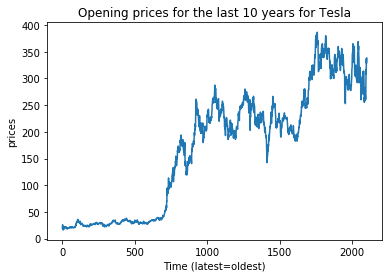

In [149]:
import matplotlib.pyplot as plt

plt.plot(features[:,0])
plt.title("Opening prices for the last 10 years for Tesla")
plt.xlabel("Time (latest=oldest)")
plt.ylabel("prices")
plt.show()

## Normalizing the data

- Since all the values indicate different things and indices, we have to normalize the data to help the algorithm in converging i.e. to find the local/global minimum efficiently.

We will use MinMaxScaler to normalize, but before then, we can split the dataset into training and testing datasets:


In [157]:
values = df.values

# normalize

scaler = MinMaxScaler(feature_range=(0,1))
features[:,:] = scaler.fit_transform(features[:,:])

# frame as supervised learning

# reframed = series_to_supervised(scaled, 1, 1)

In [158]:
lookback= 30

test_size=int(.3 * len(df))
X=[]
y=[]
for i in range(len(df)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(features[[(i+j)], :])
    X.append(t)
    y.append(features[i+ lookback,1])

In [161]:
# reshape to 3D format

X, y = np.array(X), np.array(y)
X_test = X[:test_size+lookback]

X = X.reshape(X.shape[0], lookback, 17)
#X_test = X_test.reshape(X_test.shape[0], lookback,2)

print(X.shape)
print(X_test.shape)



(2072, 30, 17)
(660, 30, 17)


In [162]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [163]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],17)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 30)            5760      
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 30)            7320      
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 20,431
Trainable params: 20,431
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [165]:
model.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
2072/2072 [==============================] - 10s 5ms/step - loss: 0.0277
Epoch 2/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0029
Epoch 3/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 4/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 5/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0015
Epoch 6/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 7/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 8/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 9/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 10/100
2072/2072 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 11/100
2072/2072 [==============================] - 4s 2ms/step - loss: 9.4181e-04
Epoch 12/100
2072/2072 [==============================] - 4s 2ms/step

In [166]:
predicted_value = model.predict(X_test)


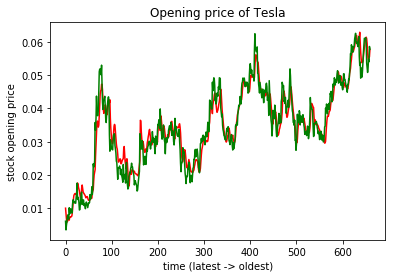

In [167]:
plt.plot(predicted_value, color='red')

plt.plot(features[lookback:test_size+(2*lookback), 1], color='green')

plt.title("Opening price of Tesla")
plt.xlabel("time ()")
plt.ylabel("stock opening price")
plt.show()


In [114]:
from sklearn.preprocessing import MinMaxScaler

train = values[:1500, :]
test = values[1500:, :]

#df_train = df.iloc[:1500, :].values
#df_test = df.iloc[1500:, :].values

print("Test and Train size:", len(train), len(test))


Test and Train size: 1500 603


In [115]:
X_train, y_train = train[:, :-1], train[:, -1]

X_test, y_test = test[:, :-1], test[:, -1]


In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1500, 17), (1500,), (603, 17), (603,))

In [120]:
# Reshape input into 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [125]:

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)


Train on 1500 samples, validate on 603 samples
Epoch 1/50
 - 3s - loss: 2.4381 - val_loss: 1.9789
Epoch 2/50
 - 0s - loss: 2.4065 - val_loss: 1.9687
Epoch 3/50
 - 0s - loss: 2.3896 - val_loss: 1.9650
Epoch 4/50
 - 0s - loss: 2.3779 - val_loss: 1.9635
Epoch 5/50
 - 0s - loss: 2.3714 - val_loss: 1.9629
Epoch 6/50
 - 0s - loss: 2.3673 - val_loss: 1.9627
Epoch 7/50
 - 0s - loss: 2.3639 - val_loss: 1.9625
Epoch 8/50
 - 0s - loss: 2.3612 - val_loss: 1.9625
Epoch 9/50
 - 0s - loss: 2.3589 - val_loss: 1.9625
Epoch 10/50
 - 0s - loss: 2.3570 - val_loss: 1.9625
Epoch 11/50
 - 0s - loss: 2.3553 - val_loss: 1.9624
Epoch 12/50
 - 0s - loss: 2.3537 - val_loss: 1.9624
Epoch 13/50
 - 0s - loss: 2.3522 - val_loss: 1.9624
Epoch 14/50
 - 0s - loss: 2.3509 - val_loss: 1.9624
Epoch 15/50
 - 0s - loss: 2.3497 - val_loss: 1.9623
Epoch 16/50
 - 0s - loss: 2.3486 - val_loss: 1.9623
Epoch 17/50
 - 0s - loss: 2.3476 - val_loss: 1.9623
Epoch 18/50
 - 0s - loss: 2.3467 - val_loss: 1.9623
Epoch 19/50
 - 0s - loss: 

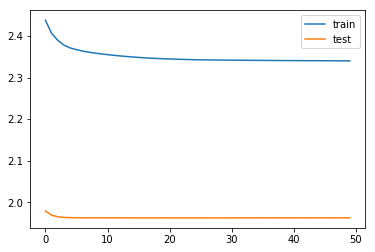

In [129]:
from matplotlib import pyplot
from numpy import concatenate
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [127]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [77]:
# Now, normalize the data, build arrays 
features = df.drop(columns='percent_change')
target = df['percent_change']

X_train = features[:1500].values
y_train = target[:1500].values

print(X_train.shape),
print(y_train.shape)

(1500, 17)
(1500,)


In [78]:
X_test = features[1500:].values
y_test = target[1500:].values

print(X_test.shape)
print(y_test.shape)


(603, 17)
(603,)


In [79]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train.reshape(-1,1))

X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [80]:
X_train.shape, X_test.shape

((1500, 17), (603, 17))

In [81]:
y_train.shape, y_test.shape

((1500, 1), (603, 1))

In [82]:
y_train[1490:]

array([[0.40436361],
       [0.43570883],
       [0.44227105],
       [0.45960467],
       [0.56277867],
       [0.47325525],
       [0.38214972],
       [0.33657637],
       [0.43234236],
       [0.41141542]])

In [83]:
y_test[590:]

array([[0.38921657],
       [0.35220096],
       [0.39745598],
       [0.45656091],
       [0.85189065],
       [0.38350695],
       [0.73726186],
       [0.60789354],
       [0.48306858],
       [0.39756132],
       [0.5168445 ],
       [0.51089724],
       [0.46466679]])

# Convert the data to time series and superivsed learning

LSTMs need: [batch_size, time_steps, Features]: in a 3D array.

batch_size: how many samples of input to put in at one time before the weights are updated. Have to use a middle number of batch size because too small of a batch size wouls make the model train slower and too large would not let the weights to be updated regularly. 

Time_steps: how many units back in time you want your model to see. in our case, we can use 30 or 60 i.e. looking at 30 or 60 days of data to predict the next days' price.

Features: The number of attributes used to represent each time step. 

If we use a time step of 5, it would look at the data of first day, second day, 3rd and forth day and fifth day, to predict the 6th' day's price i.e. looking on the past 5 days and predict the price for the sixth day.
Now with time_series of 5, if we choose the batch_size 2, we would look at the past 10 days, 5 from each time series and so on. 


#### reshaping the data into 3D format for the LSTM input layer
defined by input shape argument in the first hidden layer, 

the model.add(LSTM(batch_size, input_shape = [time_steps, features]))

In [87]:
X_train = X_train.reshape((X_train.shape[0], 30, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 30, X_test.shape[1]))


ValueError: cannot reshape array of size 25500 into shape (1500,30,17)

In [72]:
X_train.shape

(1500, 17, 1)

In [73]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [74]:
X_test.shape

(603, 17, 1)

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the LSTM layer

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set

regressor.fit(x_train, y_train, epochs =100, batch_size =32)


ValueError: Error when checking input: expected lstm_8_input to have 3 dimensions, but got array with shape (1500, 18)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(60, 30, 1500), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


NameError: name 'optimizers' is not defined